In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the Dataset
file_path ='/content/bank data.csv'  # Update the path based on your dataset location  # Update the path based on your dataset location
data = pd.read_csv(file_path, sep=';')



In [3]:
# Generate synthetic target variable for illustration
# This synthetic target will not be meaningful for real-world applications
data['y'] = np.random.choice(['yes', 'no'], size=len(data))

In [4]:
# Proceed with encoding and training
data_encoded = pd.get_dummies(data, drop_first=True)
target_column = 'y_yes'


In [5]:
# Split the data into features (X) and target (y)
X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]


In [6]:
print("Column names in the dataset:", data.columns)

Column names in the dataset: Index(['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit', 'y'], dtype='object')


In [7]:

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [8]:
# Training a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Predicting the test set results
y_pred = clf.predict(X_test)

In [10]:
# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5076142131979695
Confusion Matrix:
[[1700    0]
 [1649    0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.51      1.00      0.67      1700
        True       0.00      0.00      0.00      1649

    accuracy                           0.51      3349
   macro avg       0.25      0.50      0.34      3349
weighted avg       0.26      0.51      0.34      3349



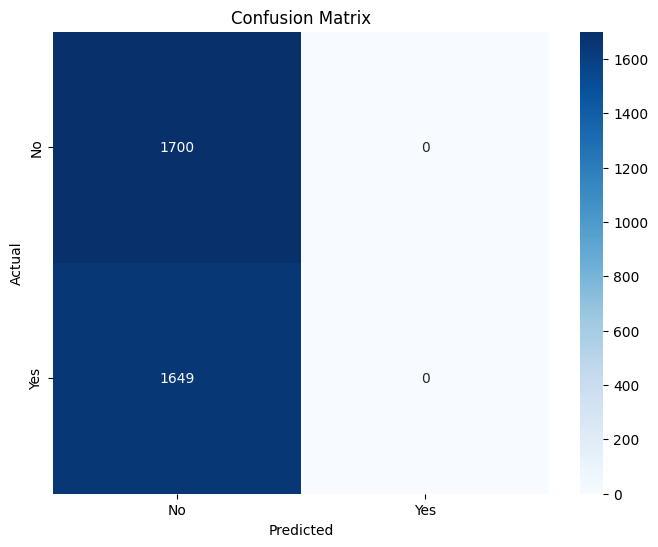

In [12]:
# Plotting the confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.5076142131979695
